In [1]:
import torch
import datasets, networks, sampling
import matplotlib.pyplot as plt
from torch import nn

In [2]:
#HYPERPARAMETERS
num_epochs = 10

# TODO Select a optimizer. [ 'adam', 'adamw', 'rmsprop' ]
optimizer_option = 'adam'

# TODO Select a lr scheduler. [ 'step', 'cosine', 'exponential']
lr_scheduler_option = ''

# TODO Select a batch size.
batch_size = 64

# TODO Select a learning rate.
lr = 1e-3


num_residual = 10
num_kernels = 64

In [3]:
ds = datasets.Dataset('mnist', batch_size=batch_size)
training_data = ds.get_train_data_loader()
test_data = ds.get_test_data_loader()

# ds.visualize_dataset(training_data)

Using device: cuda:0
Epoch:   1/ 10, Batch     1, Loss: 5.5725
Epoch:   1/ 10, Batch   101, Loss: 2.1786
Epoch:   1/ 10, Batch   201, Loss: 1.7461
Epoch:   1/ 10, Batch   301, Loss: 1.5836
Epoch:   1/ 10, Batch   401, Loss: 1.4372
Epoch:   1/ 10, Batch   501, Loss: 1.3237
Epoch:   1/ 10, Batch   601, Loss: 1.2436
Epoch:   1/ 10, Batch   701, Loss: 1.1845
Epoch:   1/ 10, Batch   801, Loss: 1.1396
Epoch:   1/ 10, Batch   901, Loss: 1.1044
-----------------------------------------
Epoch:   1 took 68.39s
epoch: 1 -> Loss: 1.09323037


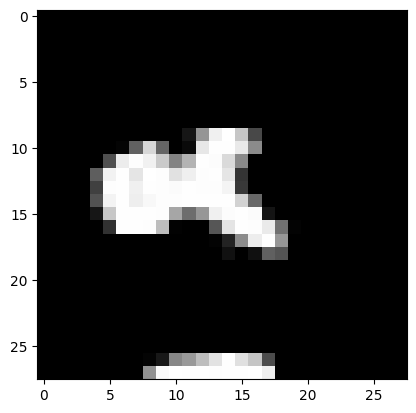

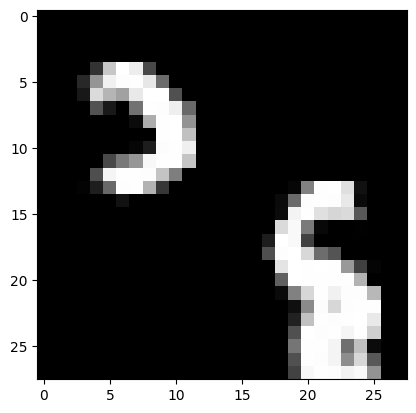

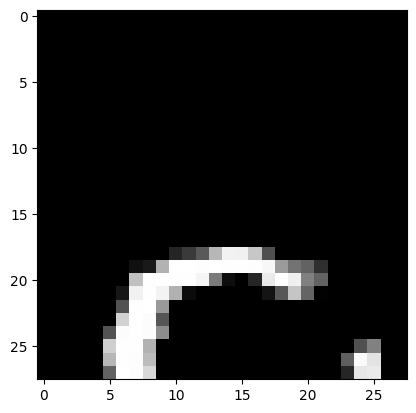

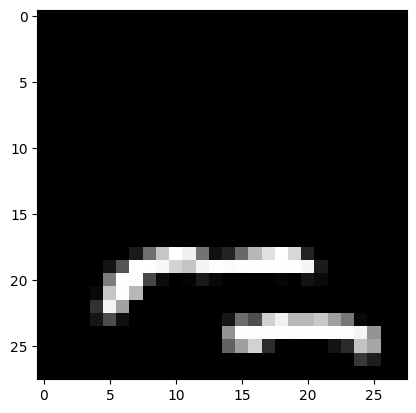

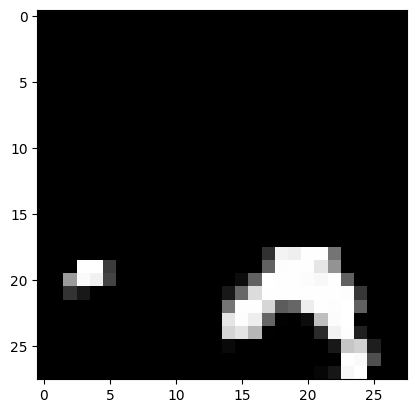

-----------------------------------------
Epoch:   2/ 10, Batch     1, Loss: 0.8075
Epoch:   2/ 10, Batch   101, Loss: 0.8104
Epoch:   2/ 10, Batch   201, Loss: 0.8108
Epoch:   2/ 10, Batch   301, Loss: 0.8107
Epoch:   2/ 10, Batch   401, Loss: 0.8101
Epoch:   2/ 10, Batch   501, Loss: 0.8090
Epoch:   2/ 10, Batch   601, Loss: 0.8084
Epoch:   2/ 10, Batch   701, Loss: 0.8076
Epoch:   2/ 10, Batch   801, Loss: 0.8070
Epoch:   2/ 10, Batch   901, Loss: 0.8066
-----------------------------------------
Epoch:   2 took 69.55s
epoch: 2 -> Loss: 0.80609000


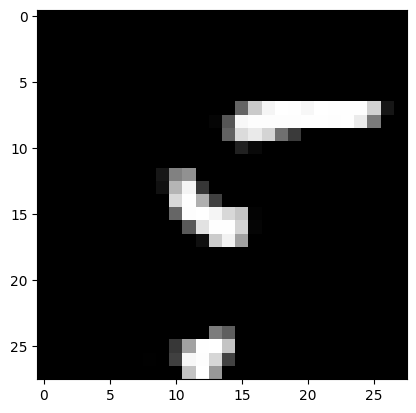

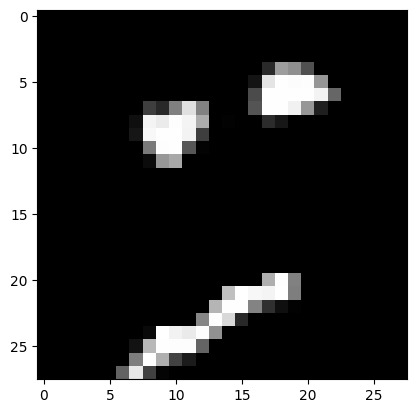

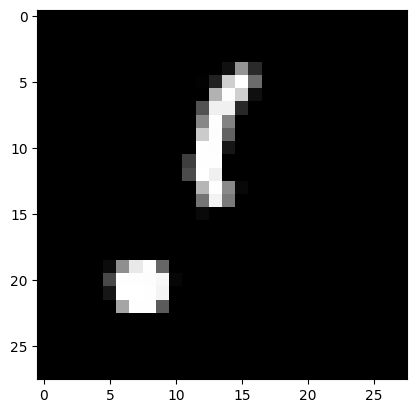

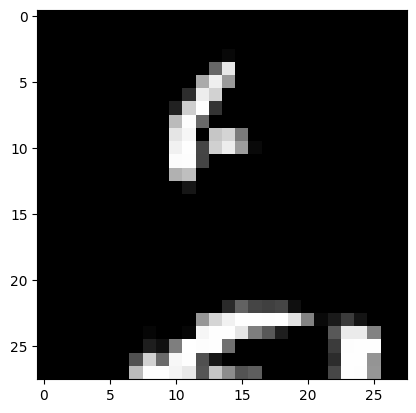

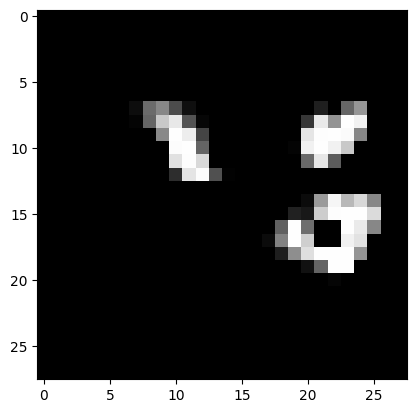

-----------------------------------------
Epoch:   3/ 10, Batch     1, Loss: 0.8184
Epoch:   3/ 10, Batch   101, Loss: 0.7993
Epoch:   3/ 10, Batch   201, Loss: 0.7985
Epoch:   3/ 10, Batch   301, Loss: 0.7977
Epoch:   3/ 10, Batch   401, Loss: 0.7982
Epoch:   3/ 10, Batch   501, Loss: 0.7973
Epoch:   3/ 10, Batch   601, Loss: 0.7968
Epoch:   3/ 10, Batch   701, Loss: 0.7969
Epoch:   3/ 10, Batch   801, Loss: 0.7964
Epoch:   3/ 10, Batch   901, Loss: 0.7961
-----------------------------------------
Epoch:   3 took 68.10s
epoch: 3 -> Loss: 0.79562998


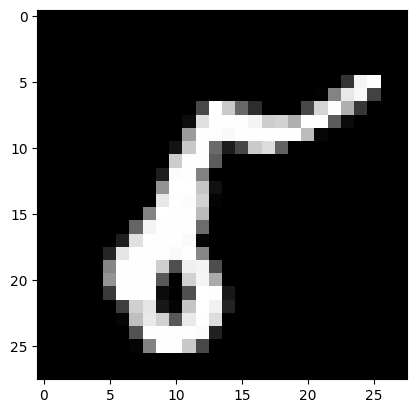

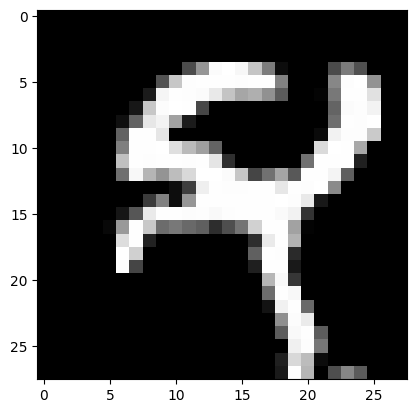

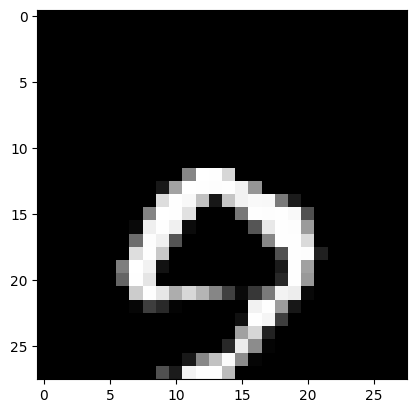

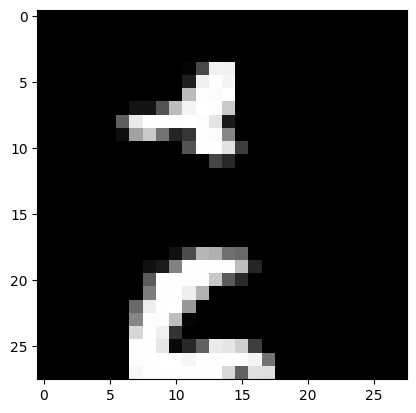

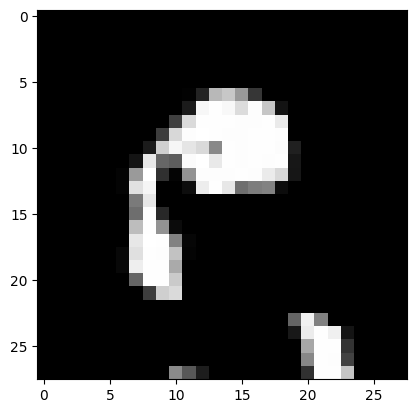

-----------------------------------------
Epoch:   4/ 10, Batch     1, Loss: 0.7695
Epoch:   4/ 10, Batch   101, Loss: 0.7942
Epoch:   4/ 10, Batch   201, Loss: 0.7908
Epoch:   4/ 10, Batch   301, Loss: 0.7901
Epoch:   4/ 10, Batch   401, Loss: 0.7897
Epoch:   4/ 10, Batch   501, Loss: 0.7891
Epoch:   4/ 10, Batch   601, Loss: 0.7890
Epoch:   4/ 10, Batch   701, Loss: 0.7890
Epoch:   4/ 10, Batch   801, Loss: 0.7883
Epoch:   4/ 10, Batch   901, Loss: 0.7877
-----------------------------------------
Epoch:   4 took 72.72s
epoch: 4 -> Loss: 0.78779811


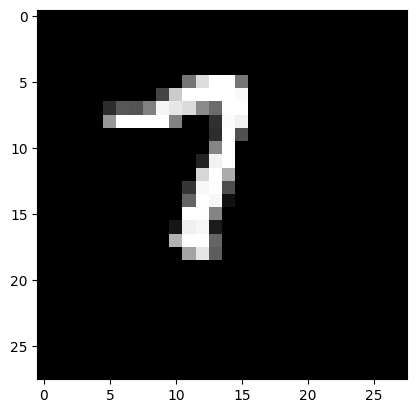

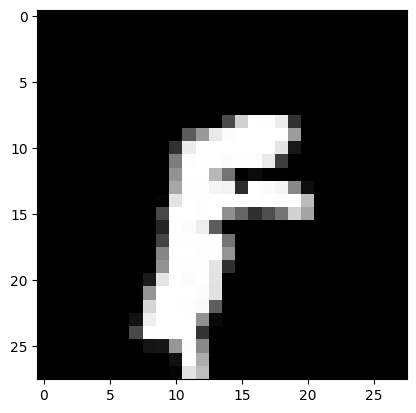

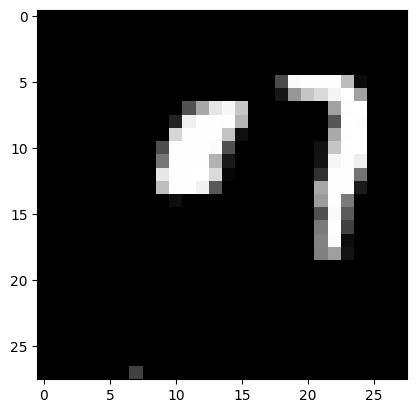

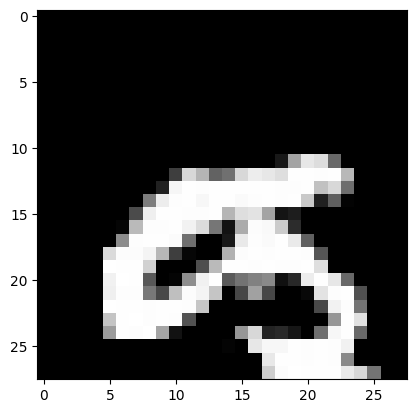

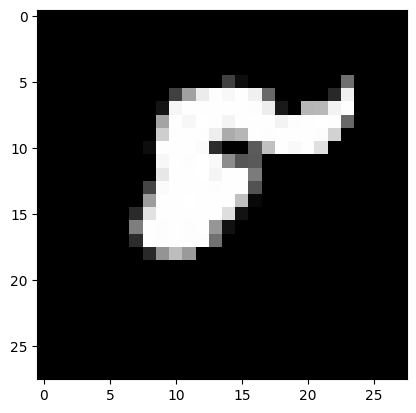

-----------------------------------------
Epoch:   5/ 10, Batch     1, Loss: 0.7981
Epoch:   5/ 10, Batch   101, Loss: 0.7878
Epoch:   5/ 10, Batch   201, Loss: 0.7874
Epoch:   5/ 10, Batch   301, Loss: 0.7840
Epoch:   5/ 10, Batch   401, Loss: 0.7832
Epoch:   5/ 10, Batch   501, Loss: 0.7830
Epoch:   5/ 10, Batch   601, Loss: 0.7822
Epoch:   5/ 10, Batch   701, Loss: 0.7828
Epoch:   5/ 10, Batch   801, Loss: 0.7826
Epoch:   5/ 10, Batch   901, Loss: 0.7821
-----------------------------------------
Epoch:   5 took 67.50s
epoch: 5 -> Loss: 0.78194946


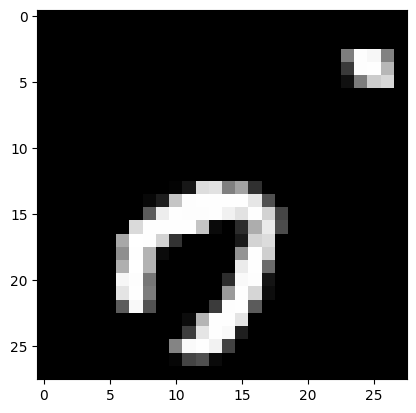

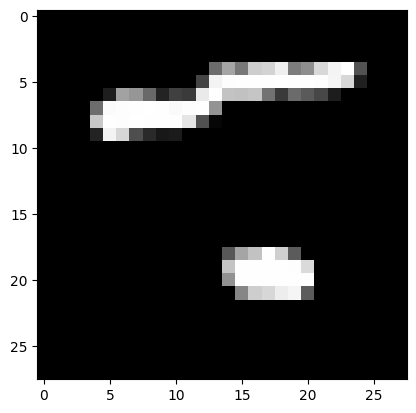

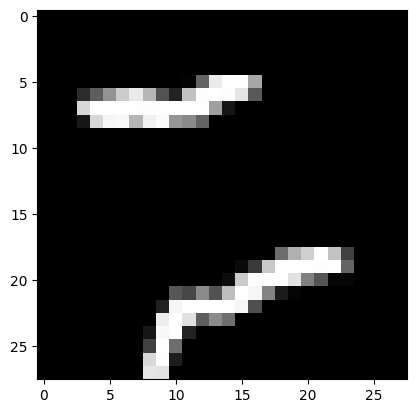

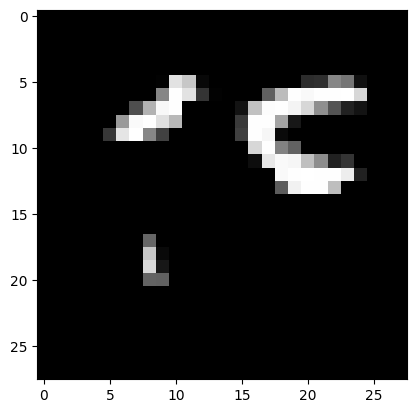

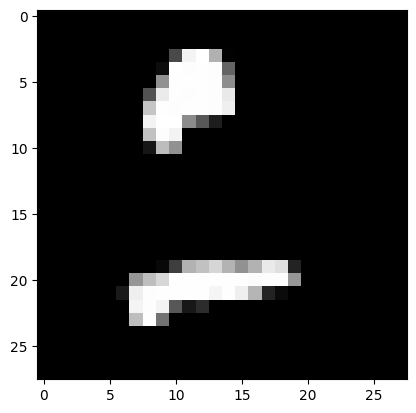

-----------------------------------------
Epoch:   6/ 10, Batch     1, Loss: 0.7825
Epoch:   6/ 10, Batch   101, Loss: 0.7839
Epoch:   6/ 10, Batch   201, Loss: 0.7794
Epoch:   6/ 10, Batch   301, Loss: 0.7766
Epoch:   6/ 10, Batch   401, Loss: 0.7765
Epoch:   6/ 10, Batch   501, Loss: 0.7755
Epoch:   6/ 10, Batch   601, Loss: 0.7757
Epoch:   6/ 10, Batch   701, Loss: 0.7760
Epoch:   6/ 10, Batch   801, Loss: 0.7757


KeyboardInterrupt: 

In [4]:
# Training for mnist
import time
from torch.optim.lr_scheduler import StepLR, ExponentialLR, CosineAnnealingLR
from torch.optim import Adam, AdamW, RMSprop, SGD 

PixelCNN = networks.PixelCNNv2(num_kernels=num_kernels)
# Select device
# if torch.cuda.is_available():
#   device = torch.device('cuda:0')
# else:
#   device = torch.device('cpu')
device = torch.device('cuda:0')
print(f'Using device: {device}')
print('=========================================')

PixelCNN.to(device)

total_loss = []
optimizer = None

# Select optimizer
if optimizer_option == "adam":
  optimizer = torch.optim.Adam(PixelCNN.parameters(), lr)
  
elif optimizer_option == "adamw":
  optimizer = torch.optim.AdamW(PixelCNN.parameters(), lr)
  
elif optimizer_option == "rmsprop":
  optimizer = torch.optim.RMSprop(PixelCNN.parameters(), lr)
  
else:
  optimizer = torch.optim.SGD(PixelCNN.parameters(), lr, momentum=0.9)  


#Select scheduler
# scheduler = None
# if lr_scheduler_option == 'step':
#     scheduler = StepLR(optimizer, step_size=2, gamma=0.9)
    
# elif lr_scheduler_option == 'exponential':
#     scheduler = ExponentialLR(optimizer, gamma=0.9)
    
# elif lr_scheduler_option == 'cosine':
#     scheduler = CosineAnnealingLR(optimizer, T_max=50, eta_min=0.0001)

overall_start_time = time.time()

# training loop
for epoch in range(num_epochs):

  epoch_start_time = time.time()
  # Switch to training mode.
  PixelCNN.train()

  losses = []
  batch_idx = 0

  for images, labels in training_data:

    images = images.to(device).to(torch.float32)

    target = (images[:, 0, :, :]*255).long().to(device)

    optimizer.zero_grad()

    out = PixelCNN(images)

    loss = nn.functional.cross_entropy(out, target)

    loss.backward()
    optimizer.step()


    losses.append(loss.detach().clone())

    if batch_idx % 100 == 0:
      average_loss = torch.stack(losses).mean().item()
      print(f'Epoch: {epoch + 1:3d}/{num_epochs:3d}, Batch {batch_idx + 1:5d}, Loss: {average_loss:.4f}')
    batch_idx += 1

  # scheduler.step()
  epoch_end_time = time.time()
  print('-----------------------------------------')
  print(f'Epoch: {epoch + 1:3d} took {epoch_end_time - epoch_start_time:.2f}s')
  avg_loss_train = torch.stack(losses).mean().item()
  if epoch % 1 == 0:
    print(f"epoch: {epoch+1} -> Loss: {avg_loss_train:.8f}")
    sampling.samplingmnist(PixelCNN, device)
  print('-----------------------------------------')

  

overall_end_time = time.time()
print('=========================================')
print(f'Training took {overall_end_time - overall_start_time:.2f}s')


d:\GIT Repos\FPG1\PixelCNNnew\completion.py:18: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  image = torch.tensor(image, dtype=torch.float32).view(1, img_chn, img_size, img_size).to(device)


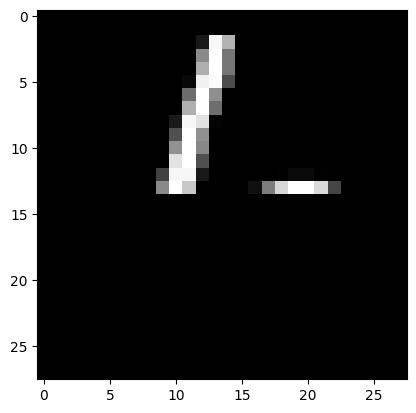

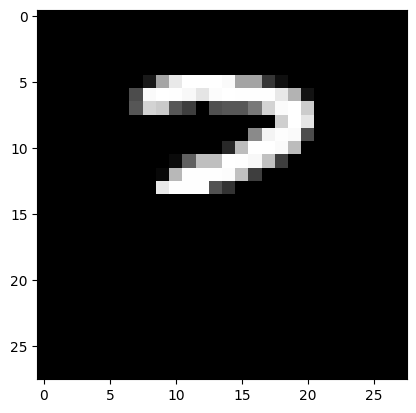

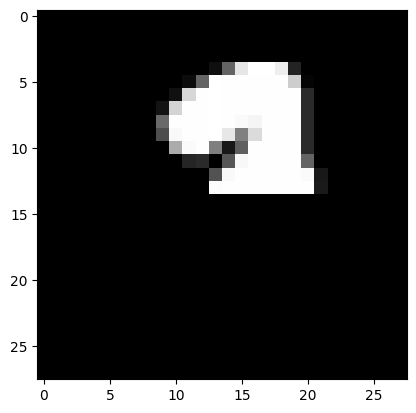

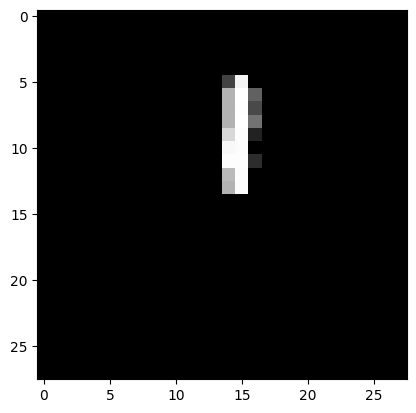

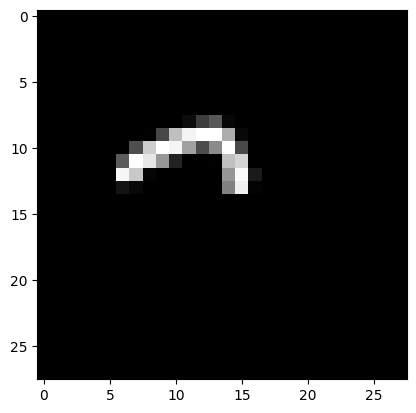

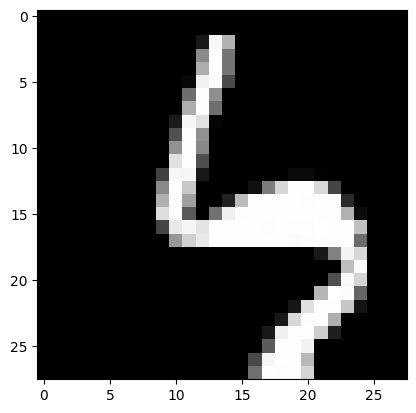

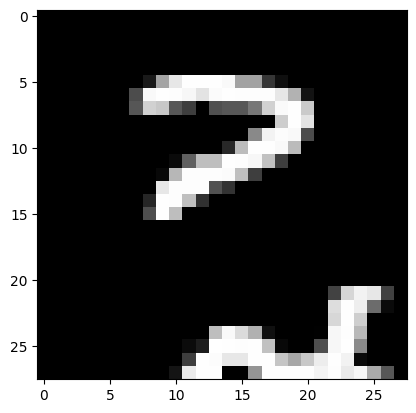

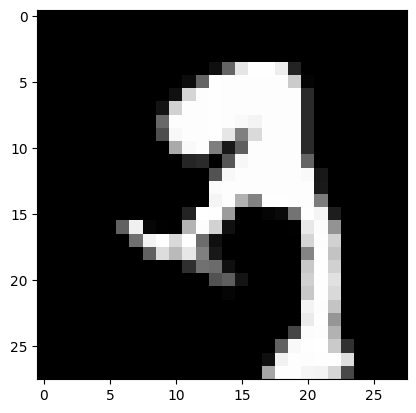

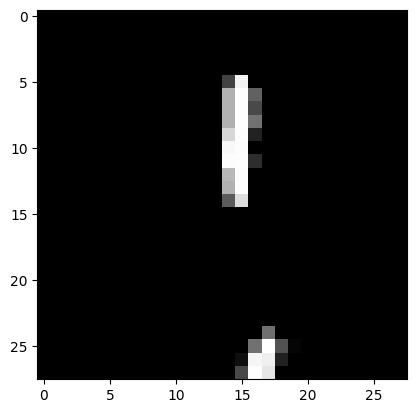

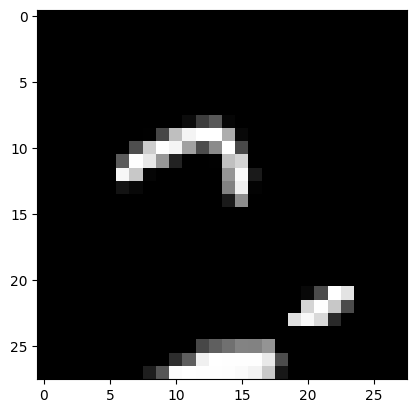

In [5]:
import completion

images = completion.get_random_image(ds, 5)
completion.completemnist(PixelCNN, device, images)

In [ ]:
# # Training for cifar10
# import time
# from torch.optim.lr_scheduler import StepLR, ExponentialLR, CosineAnnealingLR
# from torch.optim import Adam, AdamW, RMSprop, SGD 

# PixelCNN = networks.PixelCNN(num_kernels=num_kernels)
# # Select device
# # if torch.cuda.is_available():
# #   device = torch.device('cuda:0')
# # else:
# #   device = torch.device('cpu')
# device = torch.device('cuda:0')
# print(f'Using device: {device}')
# print('=========================================')
# PixelCNN.to(device)
# total_loss, total_loss_r, total_loss_g, total_loss_b = [], [], [], []
# optimizer = None

# # Select optimizer
# if optimizer_option == "adam":
#   optimizer = torch.optim.Adam(PixelCNN.parameters(), lr)
  
# elif optimizer_option == "adamw":
#   optimizer = torch.optim.AdamW(PixelCNN.parameters(), lr)
  
# elif optimizer_option == "rmsprop":
#   optimizer = torch.optim.RMSprop(PixelCNN.parameters(), lr)
  
# else:
#   optimizer = torch.optim.SGD(PixelCNN.parameters(), lr, momentum=0.9)  


# #Select scheduler
# # scheduler = None
# # if lr_scheduler_option == 'step':
# #     scheduler = StepLR(optimizer, step_size=2, gamma=0.9)
    
# # elif lr_scheduler_option == 'exponential':
# #     scheduler = ExponentialLR(optimizer, gamma=0.9)
    
# # elif lr_scheduler_option == 'cosine':
# #     scheduler = CosineAnnealingLR(optimizer, T_max=50, eta_min=0.0001)

# overall_start_time = time.time()

# # training loop
# for epoch in range(num_epochs):

#   epoch_start_time = time.time()
#   # Switch to training mode.
#   PixelCNN.train()

#   losses, losses_r, losses_g, losses_b = [], [], [], []
#   batch_idx = 0

#   for images, labels in training_data:

#     images = images.to(device).to(torch.float32)

#     target_r = (images[:, 0, :, :]*255).long().to(device)
#     target_g = (images[:, 1, :, :]*255).long().to(device)
#     target_b = (images[:, 2, :, :]*255).long().to(device)

#     optimizer.zero_grad()

#     r = PixelCNN(images, 'r')
#     g = PixelCNN(images, 'g')
#     b = PixelCNN(images, 'b')

#     loss_r = nn.functional.cross_entropy(r, target_r)
#     loss_g = nn.functional.cross_entropy(g, target_g)
#     loss_b = nn.functional.cross_entropy(b, target_b)

#     loss = loss_r + loss_g + loss_b

#     losses_r.append(loss_r.detach().clone())
#     losses_b.append(loss_g.detach().clone())
#     losses_g.append(loss_b.detach().clone())
#     losses.append(loss.detach().clone())

#     loss.backward()
#     optimizer.step()


#     losses.append(loss.detach().clone())

#     if batch_idx % 100 == 0:
#       average_loss = torch.stack(losses).mean().item()
#       print(f'Epoch: {epoch + 1:3d}/{num_epochs:3d}, Batch {batch_idx + 1:5d}, Loss: {average_loss:.4f}')
#     batch_idx += 1

#   # scheduler.step()
#   epoch_end_time = time.time()
#   print('-----------------------------------------')
#   print(f'Epoch: {epoch + 1:3d} took {epoch_end_time - epoch_start_time:.2f}s')
#   avg_loss_train_r = torch.stack(losses_r).mean().item()
#   avg_loss_train_g = torch.stack(losses_g).mean().item()
#   avg_loss_train_b = torch.stack(losses_b).mean().item()
#   avg_loss_train = torch.stack(losses).mean().item()
#   if epoch % 1 == 0:
#     print(f"epoch: {epoch+1} -> Loss: {avg_loss_train:.3f} ---- Loss Red: {avg_loss_train_r:.3f} ---- Loss Green: {avg_loss_train_g:.3f} ---- Loss Blue: {avg_loss_train_b:.3f}")
#     sampling.sampling(PixelCNN, device, 28)
#   print('-----------------------------------------')

  

# overall_end_time = time.time()
# print('=========================================')
# print(f'Training took {overall_end_time - overall_start_time:.2f}s')


Using device: cuda:0


IndexError: index 1 is out of bounds for dimension 1 with size 1